In [1]:
#importing modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#reading csv
city_data = "raw_data/city_data.csv"
ride_data = "raw_data/ride_data.csv"

pd_city_data = pd.read_csv(city_data)
pd_ride_data = pd.read_csv(ride_data)
# pd_city_data.head()
# pd_ride_data.head()

In [3]:
#sorting dataframe
pd_city_data = pd_city_data.sort_values(['city'])
pd_ride_data = pd_ride_data.sort_values(['city'])

In [4]:
#creating new dataframe
avg_fare_city = pd.DataFrame(pd_ride_data.groupby("city")["fare"].mean()).reset_index()
total_ride_city = pd.DataFrame(pd_ride_data.groupby("city")["ride_id"].count()).reset_index()
total_driver = pd.DataFrame(pd_city_data.groupby("city")["driver_count"].sum()).reset_index()
total_type = pd.DataFrame(pd_city_data.groupby("city")["type"].sum()).reset_index()

#merging all the new dataframe
avg_merge_data = pd.merge(avg_fare_city, total_ride_city, how='left', on = 'city')
avg_merge_data = pd.merge(avg_merge_data, total_driver, how='left',on = 'city')
avg_merge_data = pd.merge(avg_merge_data, total_type, how='left', on = 'city')


avg_merge_data.head()

,city,fare,ride_id,driver_count,type
0,Alvarezhaven,23.928710,31,21,Urban
1,Alyssaberg,20.609615,26,67,Urban
2,Anitamouth,37.315556,9,16,Suburban
3,Antoniomouth,23.625000,22,21,Urban
4,Aprilchester,21.981579,19,49,Urban


In [5]:
#Renaming columns for readability
pd_df = avg_merge_data.rename(columns={
    "city": "city",
    "fare" : "avg_fare",
    "ride_id" : "ride",
    "driver_count" : "driver",
    "type":"type"
})

pd_df.head()

,city,avg_fare,ride,driver,type
0,Alvarezhaven,23.928710,31,21,Urban
1,Alyssaberg,20.609615,26,67,Urban
2,Anitamouth,37.315556,9,16,Suburban
3,Antoniomouth,23.625000,22,21,Urban
4,Aprilchester,21.981579,19,49,Urban


In [6]:
#Urban: fare, ride and driver only
pd_df_fare1 = pd_df.loc[pd_df["type"] == "Urban", "avg_fare"]
pd_df_ride1 = pd_df.loc[pd_df["type"] == "Urban", "ride"]
pd_df_drive1 = pd_df.loc[pd_df["type"] == "Urban", "driver"]

#SubUrban: fare, ride and driver only
pd_df_fare2 = pd_df.loc[pd_df["type"] == "Suburban", "avg_fare"]
pd_df_ride2 = pd_df.loc[pd_df["type"] == "Suburban", "ride"]
pd_df_drive2 = pd_df.loc[pd_df["type"] == "Suburban", "driver"]

#Rural: fare, ride and driver only
pd_df_fare3 = pd_df.loc[pd_df["type"] == "Rural", "avg_fare"]
pd_df_ride3 = pd_df.loc[pd_df["type"] == "Rural", "ride"]
pd_df_drive3 = pd_df.loc[pd_df["type"] == "Rural", "driver"]

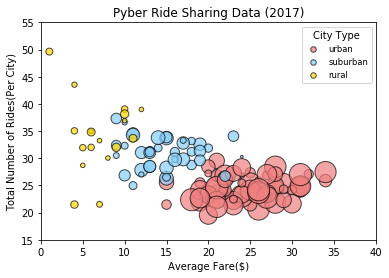

In [7]:
#Making Bubble Plot
x_limit = 40
y_axis = pd_df_fare1
x_axis = pd_df_ride1

y_axis1 = pd_df_fare2
x_axis1 = pd_df_ride2

y_axis2 = pd_df_fare3
x_axis2 = pd_df_ride3

urban_plot = plt.scatter(x_axis, y_axis, marker="o", facecolors="lightcoral", edgecolors="black",
            s= pd_df_drive1*7, alpha=0.70)

suburban_plot = plt.scatter(x_axis1, y_axis1, marker="o", facecolors="lightskyblue", edgecolors="black",
            s= pd_df_drive2*7, alpha=0.70)

rural_plot = plt.scatter(x_axis2, y_axis2, marker="o", facecolors="gold", edgecolors="black",
            s= pd_df_drive3*7, alpha=0.70)

plt.ylim(15, 55)
plt.xlim(0, x_limit)

#setting legend
lgnd = plt.legend((urban_plot,suburban_plot,rural_plot),('urban','suburban','rural'), fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City Type", 
                  labelspacing=0.5)

lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]


#adding title and labels
plt.title("Pyber Ride Sharing Data (2017)")
plt.xlabel("Average Fare($)")
plt.ylabel("Total Number of Rides(Per City)")
plt.show()

In [8]:
#making and merging new data frame for Pie Charts
merge_data = pd.merge(pd_city_data, pd_ride_data, how='left', on = 'city')

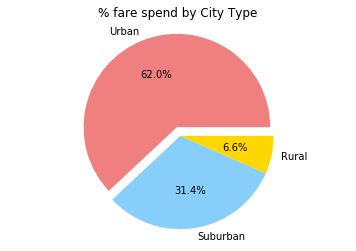

In [9]:
#Percent fare by city type
urmergedf = merge_data.loc[merge_data["type"] == "Urban", "fare"]
urmerge_sumf = urmergedf.sum()

submergedf = merge_data.loc[merge_data["type"] == "Suburban", "fare"]
submerged_sumf = submergedf.sum()

rumergedf = merge_data.loc[merge_data["type"] == "Rural", "fare"]
rumerged_sumf = rumergedf.sum()


#pie chart
labels = ["Urban", "Suburban", "Rural"]
sizes = [urmerge_sumf, submerged_sumf, rumerged_sumf]
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (0.1, 0, 0)

plt.title("% fare spend by City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%.1f%%", shadow=False, startangle=0)
plt.axis("equal")
# plt.savefig("pie.png")
plt.show()


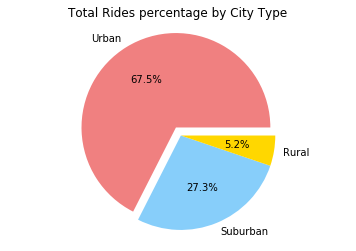

In [10]:
#Total Ride Percent by City type
urmergedr = merge_data.loc[merge_data["type"] == "Urban", "ride_id"]
urmerge_sumr = urmergedr.count()

submergedr = merge_data.loc[merge_data["type"] == "Suburban", "ride_id"]
submerged_sumr = submergedr.count()

rumergedr = merge_data.loc[merge_data["type"] == "Rural", "ride_id"]
rumerged_sumr = rumergedr.count()

#pie chart
labels = ["Urban", "Suburban", "Rural"]
sizes = [urmerge_sumr, submerged_sumr, rumerged_sumr]
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (0.1, 0, 0)

plt.title("Total Rides percentage by City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%.1f%%", shadow=False, startangle=0)
plt.axis("equal")
# plt.savefig("pie.png")
plt.show()


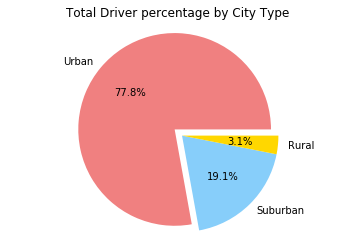

In [11]:
#Total Driver Percent by City type
urmergedd = pd_city_data.loc[pd_city_data["type"] == "Urban", "driver_count"]
urmerge_sumd = urmergedd.sum()

submergedd = pd_city_data.loc[pd_city_data["type"] == "Suburban", "driver_count"]
submerged_sumd = submergedd.sum()

rumergedd = pd_city_data.loc[pd_city_data["type"] == "Rural", "driver_count"]
rumerged_sumd = rumergedd.sum()

#Pie Plot
labels = ["Urban", "Suburban", "Rural"]
sizes = [urmerge_sumd, submerged_sumd, rumerged_sumd]
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (0.1, 0, 0)


plt.title("Total Driver percentage by City Type")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%.1f%%", shadow=False, startangle=0)
plt.axis("equal")
# plt.savefig("pie.png")
plt.show()